ShapefileException: Unable to open data/ne_10m_admin_1_states_provinces.shx

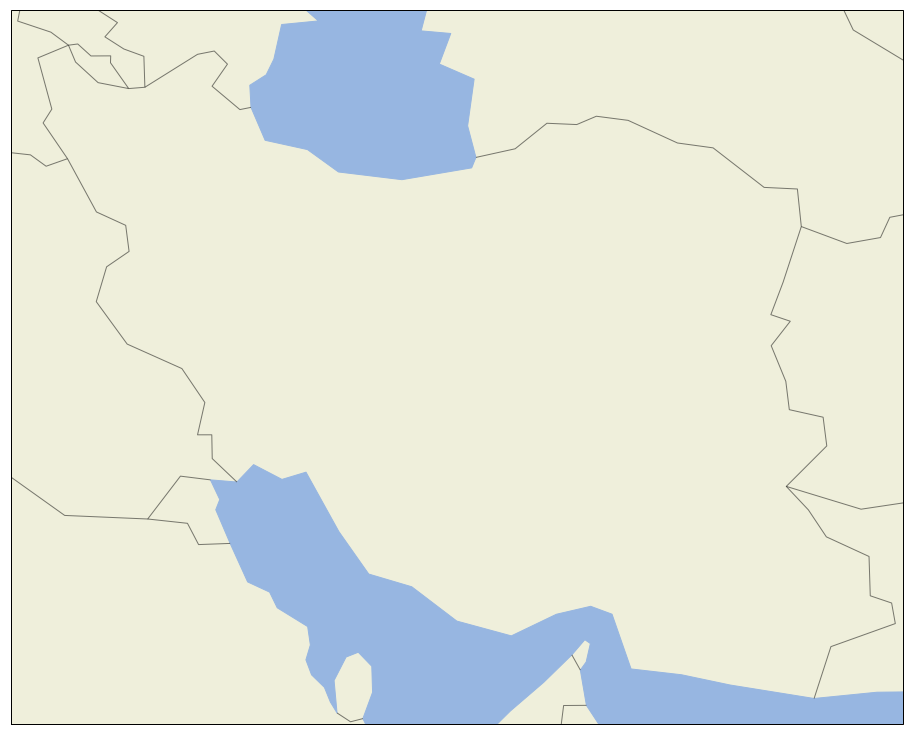

In [14]:
# http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

Capitals = pd.read_excel('data/ProvincePopulationsAndCoords.xlsx',index_col=0) # Downloaded from http://www.statoids.com/uir.html and merged with coordinates from google geocode (using google api) 
fig = pl.figure(figsize=(16,16))
ax = pl.axes(projection=ccrs.PlateCarree())
# ax.set_extent([80, 170, -45, 30])
coords = (32.5,53.5) # N, E
L = (8,10) # N, E
ax.set_extent([coords[1]-L[1], coords[1]+L[1], coords[0]-L[0], coords[0]+L[0]])

# Put a background image on for nice sea rendering.
ax.stock_img()

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
# ax.add_feature(cartopy.feature.RIVERS)


# shpfilename = shpreader.natural_earth(resolution='110m',
#                                       category='cultural',
#                                       name='admin_1_states_provinces')    
shpfilename = 'data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'  # http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip

reader = shpreader.Reader(shpfilename)
provinces = [province for province in reader.records() if province.attributes['admin'] == 'Iran']

for province in provinces:
    ax.add_geometries(province.geometry, ccrs.PlateCarree(),
                      facecolor='linen',edgecolor='black',
                      label=province.attributes['name'])
    
    pl.text(province.attributes['longitude'],
            province.attributes['latitude'],
            province.attributes['name'].upper(),
            color='darkred',ha='center',
            va='center',fontsize=8,fontweight='bold')
    
    if province.attributes['name'] in Capitals.index:
        capital = Capitals.loc[province.attributes['name']]

        pl.text(capital['longitude'],
            capital['latitude'],
            '   '+capital['Capital'],
            color='black',ha='left',
            va='center',fontsize=8)
        
        pl.plot(capital['longitude'],capital['latitude'],'bo',markersize=4)